In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Age'].isnull().sum()

177

In [43]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Agemedian        0
Age_median       0
Agerandom      177
dtype: int64

#What are the different types of Missing Data?
Missing Completely at Random, MCAR:A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [47]:
#Example
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agemedian,Age_median,Agerandom,Pclassmedian,Pclassrandom
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,38.0,38.0,1,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,62.0,62.0,1,1


#Missing Data Not At Random(MNAR): Systematic missing ValuesThere is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [27]:
#Handling missing values:
#1. Mean/ Median/Mode replacement
#2. Random Sample Imputation
#3. Capturing NAN values with a new feature
#4. End of Distribution imputation
#5. Arbitrary imputation
#6. Frequent categories imputation

#Mean/Median/Mode imputation


#When the above imputation should be used?:The assumption is that when mean/median/mode should be used when data values are missing completely at random(MCAR). We replace the NaN values with the most frequent occured varaible.


In [4]:
df['Age'].isnull().sum()

177

In [6]:
median=df['Age'].median()
median

28.0

In [19]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [21]:
impute_nan(df,'Age',median)
df['Age_median'].isnull().sum()

0

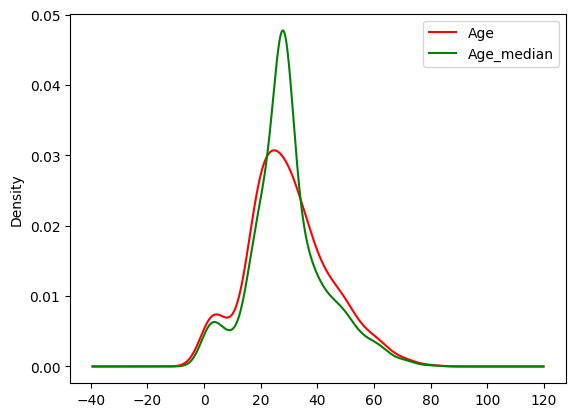

In [23]:
%matplotlib inline
fig=plt.figure()
ax=fig.add_subplot(111)
df.Age.plot(kind='kde',ax=ax,color='red')
df.Age_median.plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# Advantages of Mean/Median Imputation


In [24]:
#1.Easy to Implement
#2.Robust to outliers

#Disadvantages of Mean/Median Imputation

In [25]:
#1.Changing or distortion in variance
#2.Impacts the correlation